#Theoritical

###1. Can we use Bagging for regression problems
 Bagging can be used for regression problem, with same or multiple algorithms.The average of the models is taken as the predicted output for the regression problem


###2. What is the difference between multiple model training and single model training

Single model training works on creating a single model of a particular algorithm.
Multiple model is trained with part of the data in case of bagging. the output from all the models are combined to get the final output.

Multiple model reduces the variance & overfitting. Different models can detect the noise & understand different patterns in the data

###3. Explain the concept of feature randomness in Random Forest

During the construction of random forest, random subset of features are sent to different decision trees. This ensures that the trees are not correlated. It reduces the risk of over fitting.


###4. What is OOB (Out-of-Bag) Score

The subset of data rows sent to each decision tree is randomly picked from the train data. This remaining data is used to calculate the accuracy of that particular model. The resulting score is OOB score.



###5. How can you measure the importance of features in a Random Forest model

using model.feature_importances_

###6. Explain the working principle of a Bagging Classifier

Bagging classifier is constructed with one or multiple type of models.
There is a voting mechanism where each model's prediction is taken into account. The class having the highest number of voting is decided as the prediceted class.

###7. How do you evaluate a Bagging Classifier's performance

Bagging classifier's performance can be measured using OOB score for the individual models. The final result can be compared to other algorithm.

###8. How does a Bagging Regressor work

Bagging Regressor is constructed with one or multiple type of models.
The average of the each model's prediction is taken as the regression prediction of the Bagging.

###9. What is the main advantage of ensemble techniques
  - Better generalization
  - less overfitting
  - Improved accuracy
  - Robust predictions

###10. What is the main challenge of ensemble methods
  - Computation cost & cost
  - Reduced interpetability

###11. Explain the key idea behind ensemble techniques

Key idea is to combine multiple models to perform the regression or classification task. There are 3 ways bagging, Boosting & Stacking.

Bagging has models in parallel
Boosing keeps models in sequence
Stacking has both sequential & parallel models


###12. What is a Random Forest Classifier

Random forest classifier is a bagging algorithm that combines multiple decision trees together to perform classification tasks.
There is a voting mechanism where each model's prediction is taken into account. The class having the highest number of voting is decided as the prediceted class.

###13. What are the main types of ensemble techniques

There are 3 ways bagging, Boosting & Stacking.

Bagging has models in parallel
Boosing keeps models in sequence
Stacking has both sequential & parallel models

###14. What is ensemble learning in machine learning

A technique to combine multiple model preidctions to improve the overall performance, reduce over fitting.

###15. When should we avoid using ensemble methods
 When the data set is simple & limited
 When thre is computational constraints
 When the performance gain is marginal compared to individual model

###16. How does Bagging help in reducing overfitting
 Bagging splits the data & fetaure into subsets & provide to individual models. This reduces the overfitting & increase generalization. Every model is trained independently


###17. Why is Random Forest better than a single Decision Tree
  - Better generalization
  - less overfitting
  - Improved accuracy
  - Robust predictions
  - Provides the measure of feature importance

###18. What is the role of bootstrap sampling in Bagging

Bootstrap sampling geenrates multiple subsets of original training data randomly with replacement.Training each model with a different data set prevents model over fitting.

###19. What are some real-world applications of ensemble techniques
  - Classification tasks in NLP
  - In different domains like finance, healthcare
  - To create a generalized, accurate & robust model


###20. What is the difference between Bagging and Boosting

In bagging the models are kept paralelly, the average/ vote of the prediction is taken as the final outcome.
In boosting the models are kept sequentially.Each new model tries to correct the erros from the previous model.Each model depends on the previous model

#Practical



In [111]:
###21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = BaggingClassifier(estimator =DecisionTreeClassifier(),n_estimators=20)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"Bagging Classifier accuracy_score {accuracy_score(y_test, y_pred)}")


#Using VotingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models =[]
for i in range(1,5):
  models.append((str(i),DecisionTreeClassifier()))

classifier = VotingClassifier(estimators=models,voting='hard')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"Voting Classifier accuracy_score {accuracy_score(y_test, y_pred)}")

Bagging Classifier accuracy_score 0.945
Voting Classifier accuracy_score 0.945


In [116]:
###22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings('ignore')


X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

estimators=[DecisionTreeRegressor()]
mse=[]
r2=[]

for est in estimators:
  regressor = BaggingRegressor(estimator=est,n_estimators=40)
  regressor.fit(X_train,y_train)
  y_pred = regressor.predict(X_test)
  mse.append(mean_squared_error(y_test, y_pred))
  r2.append(r2_score(y_test, y_pred))

print(f"BaggingRegressor Decision tree MSE score {mse[0]}  R2 {r2[0]}")


#Using Voting Rgressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

warnings.filterwarnings('ignore')


X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models =[]
for i in range(1,5):
  models.append((str(i),DecisionTreeRegressor()))

regressor = VotingRegressor(estimators=models)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print(f"Voting Regressor - MSE {mean_squared_error(y_test, y_pred)} R2 {r2_score(y_test, y_pred)}")



BaggingRegressor Decision tree MSE score 3194.246319429576  R2 0.8723755963660245
Voting Regressor - MSE 6662.9364000584865 R2 0.7036682091805319


In [13]:
###23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=50,criterion='gini')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(f"feature importance scores {model.feature_importances_}")


accuracy_score 0.9736842105263158
feature importance scores [0.04967353 0.00958616 0.07915731 0.03440154 0.00788159 0.01070042
 0.06865448 0.0984752  0.00694832 0.00436461 0.01837689 0.00542245
 0.0052463  0.01503656 0.00440839 0.00418174 0.00772391 0.00595749
 0.00422287 0.00729618 0.11647123 0.0146942  0.13217079 0.13036659
 0.00957106 0.01179601 0.02265542 0.08289296 0.02368592 0.0079799 ]


In [17]:
###24 Train a Random Forest Regressor and compare its performance with a single Decision Tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor(n_estimators=50,criterion='squared_error')
rf.fit(X_train,y_train)

y_rf_pred = rf.predict(X_test)

dt = DecisionTreeRegressor(criterion='squared_error')
dt.fit(X_train,y_train)

y_dt_pred = dt.predict(X_test)

from sklearn.metrics import r2_score

print(f"Decision tree accuracy_score {r2_score(y_test, y_dt_pred)}")
print(f"Random Forest accuracy_score {r2_score(y_test, y_rf_pred)}")


Decision tree accuracy_score 0.6430596734982912
Random Forest accuracy_score 0.8542488562748692


In [20]:
###25.  Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=50,criterion='gini',oob_score=True)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(f"OOB score {model.oob_score_}")

accuracy_score 0.9649122807017544
OOB scores 0.9604395604395605


In [23]:
###26. Train a Bagging Classifier using SVM as a base estimator and print accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = BaggingClassifier(estimator =SVC(),n_estimators=20)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")

accuracy_score 0.96


[92, 93, 94, 94, 94, 94, 94, 94, 95, 95, 95, 96, 96]


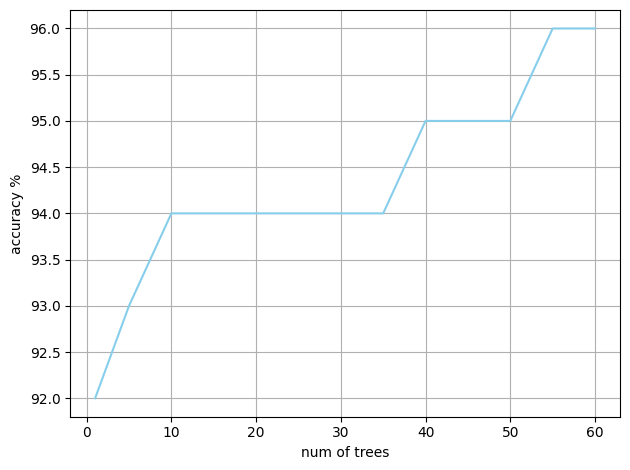

In [64]:
###27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import random

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

estimators=[1,5,10,15,20,25,30,35,40,45,50,55,60]
accuracy=[]
from sklearn.metrics import accuracy_score
for est in estimators:
  model = RandomForestClassifier(n_estimators=est,criterion='gini',oob_score=True)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  #print(f"accuracy_score for {est} extimators is :{accuracy_score(y_test, y_pred)}")

accuracy = sorted(accuracy)
accuacy_percent = [round(i*100) for i in accuracy]
print(accuacy_percent)
plt.plot(estimators, accuacy_percent, color='skyblue')
plt.xlabel("num of trees")
plt.ylabel("accuracy %")
plt.tight_layout()
plt.grid(True)
plt.show()

In [46]:
###28.  Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = BaggingClassifier(estimator =LogisticRegression(),n_estimators=40)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import roc_auc_score

print(f"AUC {roc_auc_score(y_test, y_pred)}")

AUC 0.9898000815993472


Feature importance scores [0.18490131 0.13522524 0.15409221 0.01893819 0.02903845 0.01432852
 0.33407661 0.12939947]


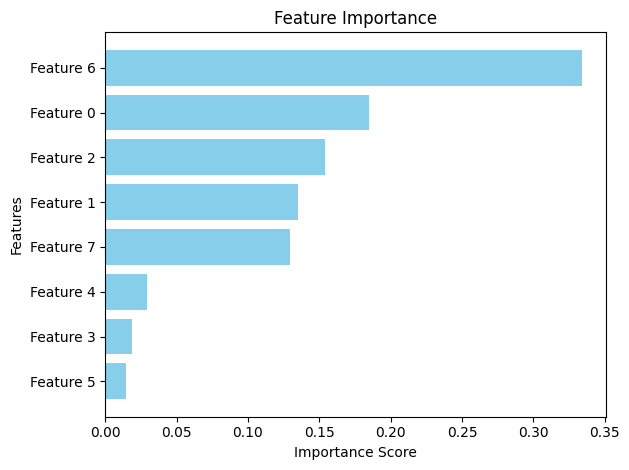

In [54]:
###29. Train a Random Forest Regressor and analyze feature importance scores

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor(n_estimators=50,criterion='squared_error')
rf.fit(X_train,y_train)

y_rf_pred = rf.predict(X_test)
print(f"Feature importance scores {rf.feature_importances_}")

# Create a DataFrame for better visualization
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf.feature_importances_})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [61]:
###30. Train an ensemble model using both Bagging and Random Forest and compare accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestClassifier(n_estimators=50,criterion='gini')
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

bc = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),n_estimators=50)
bc.fit(X_train,y_train)
y_bc_pred = bc.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score for Random Forest: {accuracy_score(y_test, y_rf_pred)}")
print(f"accuracy_score for Bagging Classifier: {accuracy_score(y_test, y_bc_pred)}")

accuracy_score for Random Forest: 0.956140350877193
accuracy_score for Bagging Classifier: 0.9298245614035088


In [68]:
###31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
param ={
    'n_estimators':[20,30,40],
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,5],
    'min_samples_split':[3,4]
}
cv = GridSearchCV(param_grid=param, cv=3, verbose=0, estimator = RandomForestClassifier())
cv.fit(X_train,y_train)
y_rf_pred = cv.best_estimator_.predict(X_test)

print(f"Best params {cv.best_params_} Best score {cv.best_score_}")
print(f"Accuracy {accuracy_score(y_rf_pred,y_test)}")



Best params {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 20} Best score 0.9582607180202162
Accuracy 0.9824561403508771


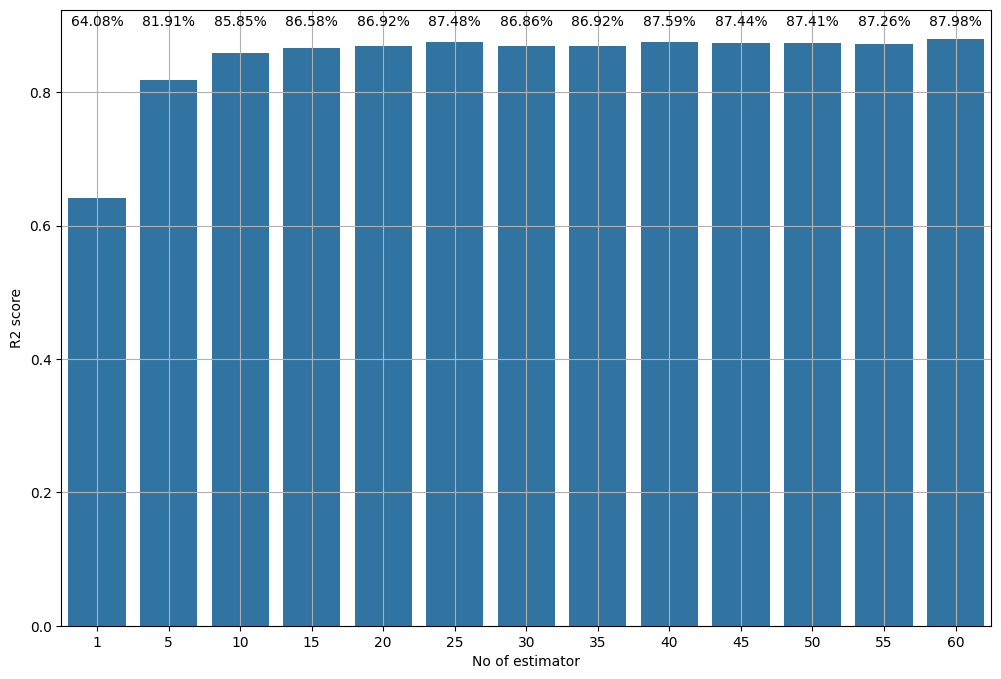

In [80]:
###32. Train a Bagging Regressor with different numbers of base estimators and compare performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,r2_score

warnings.filterwarnings('ignore')


X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

estimators=[1,5,10,15,20,25,30,35,40,45,50,55,60]
r2=[]

for est in estimators:
  regressor = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=est)
  regressor.fit(X_train,y_train)
  y_pred = regressor.predict(X_test)
  r2.append(r2_score(y_test, y_pred))

plt.figure(figsize=(12,8))
sns.barplot(x=estimators,y=r2)
plt.xlabel("No of estimator")
plt.ylabel("R2 score")
plt.grid(True)
for i, score in enumerate(r2):
    plt.text(x=i, y=0.9, s=f"{round(score * 100, 2)}%", ha='center', fontsize=10)
plt.show()

accuracy_score 0.9736842105263158
Number of misclassified samples: 3


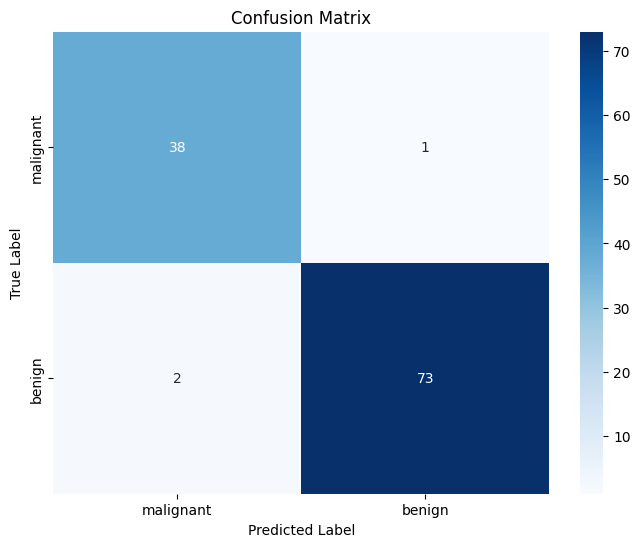

In [90]:
###33. Train a Random Forest Classifier and analyze misclassified samples
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')

data =load_breast_cancer()
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=50,criterion='gini')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")

print(f"Number of misclassified samples: {len(np.where(y_test != y_pred)[0])}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [89]:
###34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

X,y = X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

bc = BaggingClassifier(estimator =DecisionTreeClassifier(criterion='gini'),n_estimators=50)
bc.fit(X_train,y_train)

y_bc_pred = bc.predict(X_test)

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

y_dt_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"Decision tree accuracy_score {accuracy_score(y_test, y_dt_pred)}")
print(f"Bagging classifier accuracy_score {accuracy_score(y_test, y_bc_pred)}")

Decision tree accuracy_score 0.935
Bagging classifier accuracy_score 0.965


accuracy_score 0.9298245614035088
Number of misclassified samples: 8


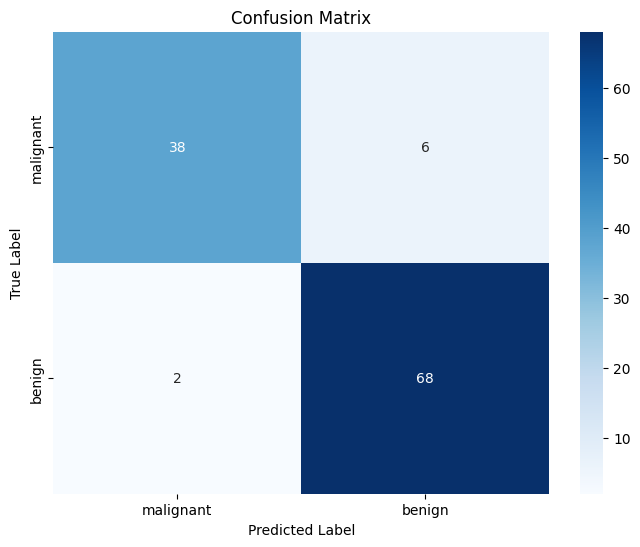

In [91]:
###35. Train a Random Forest Classifier and visualize the confusion matrix

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')

data =load_breast_cancer()
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=50,criterion='gini')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")

print(f"Number of misclassified samples: {len(np.where(y_test != y_pred)[0])}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [121]:
###36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimators = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

base_estimators = [
    ('decision_tree', DecisionTreeClassifier(criterion='entropy')),
    ('svm', SVC(probability=True)),
    ('logistic regression',LogisticRegression())
]
print("\nComparing Base Estimators:")
for name, estimator in base_estimators:
    estimator.fit(X_train, y_train)
    base_y_pred = estimator.predict(X_test)
    base_accuracy = accuracy_score(y_test, base_y_pred)
    print(f"{name.capitalize()} Accuracy: {base_accuracy:.4f}")


Stacking Classifier Accuracy: 0.8800

Comparing Base Estimators:
Decision_tree Accuracy: 0.8550
Svm Accuracy: 0.8750
Logistic regression Accuracy: 0.8750


In [93]:
###37.  Train a Random Forest Classifier and print the top 5 most important features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=50,criterion='gini')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(f"Top 5 feature importance scores {model.feature_importances_[0:5]}")

accuracy_score 0.9473684210526315
Top 5 feature importance scores [0.04287621 0.0087589  0.04155899 0.07299006 0.00620705]


In [94]:
###38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = BaggingClassifier(estimator =SVC(),n_estimators=20)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print(f"precision_score {precision_score(y_test, y_pred)}")
print(f"recall_score {recall_score(y_test, y_pred)}")
print(f"f1_score {f1_score(y_test, y_pred)}")

precision_score 0.9595959595959596
recall_score 0.9405940594059405
f1_score 0.95


[93, 95, 96, 96, 97, 97, 97, 97, 97]


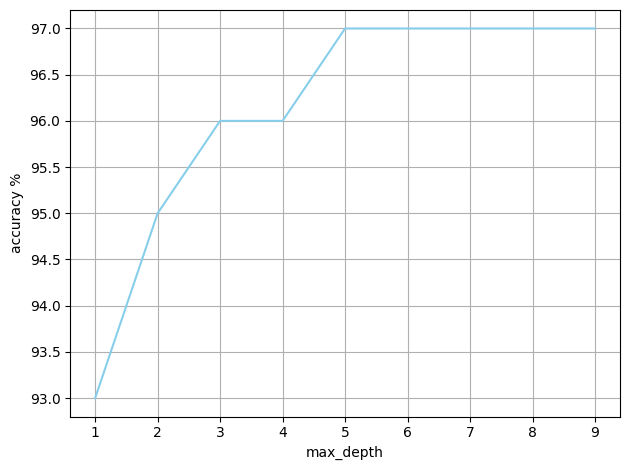

In [96]:
###39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import random

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

max_depth=[1,2,3,4,5,6,7,8,9]
accuracy=[]
from sklearn.metrics import accuracy_score
for d in max_depth:
  model = RandomForestClassifier(criterion='gini',oob_score=True,max_depth=d)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  #print(f"accuracy_score for {est} extimators is :{accuracy_score(y_test, y_pred)}")

accuracy = sorted(accuracy)
accuacy_percent = [round(i*100) for i in accuracy]
print(accuacy_percent)
plt.plot(max_depth, accuacy_percent, color='skyblue')
plt.xlabel("max_depth")
plt.ylabel("accuracy %")
plt.tight_layout()
plt.grid(True)
plt.show()

In [98]:
###40.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
###performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings('ignore')


X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

estimators=[DecisionTreeRegressor(),KNeighborsRegressor()]
r2=[]

for est in estimators:
  regressor = BaggingRegressor(estimator=est,n_estimators=40)
  regressor.fit(X_train,y_train)
  y_pred = regressor.predict(X_test)
  r2.append(r2_score(y_test, y_pred))

print(f"Decision tree R2 score {r2[0]}")
print(f"KNN R2 score {r2[1]}")

Decision tree R2 score 0.8581706552848059
KNN R2 score 0.8517344460261156


In [101]:
###41.  Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = RandomForestClassifier(n_estimators=50,criterion='gini')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import roc_auc_score

print(f"AUC {roc_auc_score(y_test, y_pred)}")


AUC 0.9254701880752302


In [104]:
###42.  Train a Bagging Classifier and evaluate its performance using cross-validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = BaggingClassifier(estimator =SVC(),n_estimators=20)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print(f"accuracy_score {accuracy_score(y_test, y_pred)}")
print(f"Cross Validation scores: {cv_scores}")

accuracy_score 0.94
Cross Validation scores: [0.9375  0.9     0.9375  0.925   0.89375]


AUC 0.9248699479791918


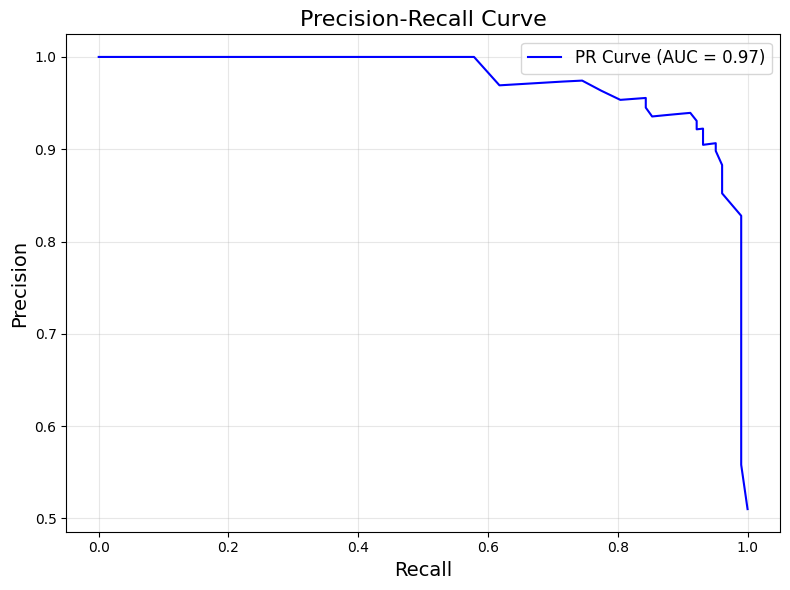

In [102]:
###43. Train a Random Forest Classifier and plot the Precision-Recall curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')


X,y = make_classification(n_samples=1000,n_features=8,n_classes=2,n_redundant=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

classifier = RandomForestClassifier(n_estimators=50,criterion='gini')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import roc_auc_score

print(f"AUC {roc_auc_score(y_test, y_pred)}")

y_pred_proba = classifier.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve,auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.grid(alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

In [117]:
###44.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, n_redundant=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('logistic_regression', LogisticRegression())
]

stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=5)
stacking_classifier.fit(X_train, y_train)

y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.9200


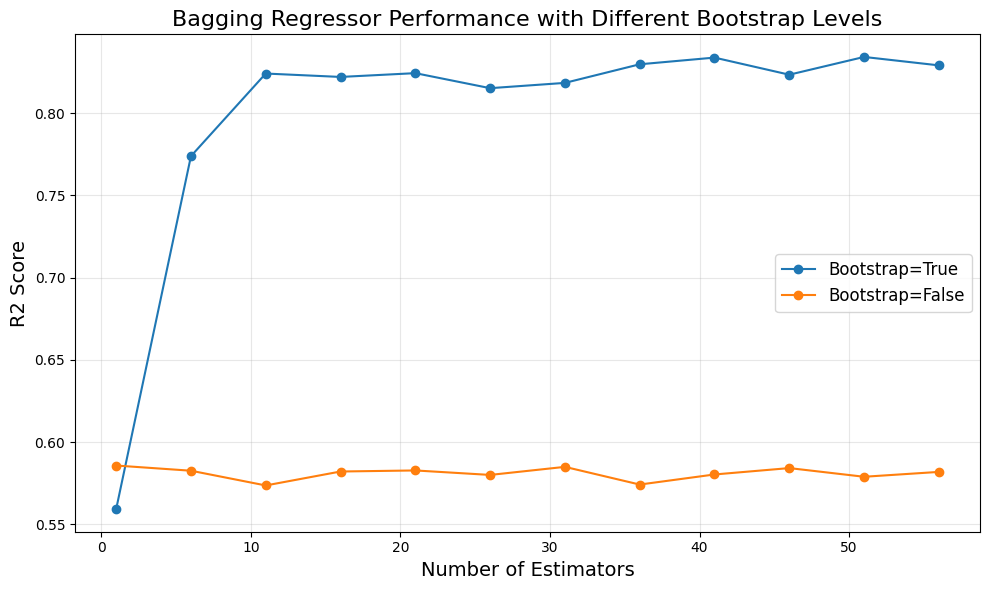

In [108]:
###45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,r2_score

warnings.filterwarnings('ignore')


X,y = make_regression(n_samples=1000,n_features=8,noise=0.1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

bootstrap_levels = [True, False]
results ={}

for bootstrap in bootstrap_levels:
    r2 = []
    for est in range(1, 61, 5):
        regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=est, bootstrap=bootstrap)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        r2.append(r2_score(y_test, y_pred))
    results[bootstrap] = r2

plt.figure(figsize=(10, 6))
for bootstrap, r2_scores in results.items():
    plt.plot(range(1, 61, 5), r2_scores, marker='o', label=f"Bootstrap={bootstrap}")
plt.xlabel("Number of Estimators", fontsize=14)
plt.ylabel("R2 Score", fontsize=14)
plt.title("Bagging Regressor Performance with Different Bootstrap Levels", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()